In [31]:
import numpy as np
import pickle
from glob import glob 
import os
import sys
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
import re
from src.cmos_plotter.Firing_metric_plotter import *

In [2]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/'
OUTPUT_PATH = os.path.join(MAIN_PATH, 'Results')

In [3]:
SORTER_PATH = os.path.join(MAIN_PATH, 'Sorters')
print(SORTER_PATH)

/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters


In [73]:
# Find all pickle files
pickle_files = glob(os.path.join(SORTER_PATH,"*.pkl"))
print(pickle_files)

# Initialize lists for both types of results
all_extremum_results = []
all_spikemat_results = []

# Process each file
for file in pickle_files:
    print(f"Processing {file}...")
    extremum_results, spikemat_results = process_spike_data(file)
    all_extremum_results.extend(extremum_results)
    all_spikemat_results.extend(spikemat_results)

['/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/ID1765_N8_DIV140_DATE20250207_1023_spontaneous_NGN2.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/ID1811_N3_DIV63_DATE20250117_1638_spontaneous_CoCulture.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/ID2034_N3_DIV35_DATE20241127_1544_spontaneous_GABA.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/ID1811_N0_DIV33_DATE20241218_1117_spontaneous_CoCulture.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/ID1908_N4_DIV23_DATE20241115_1717_spontaneous_NGN2.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/ID2034_N1_DIV23_DATE20241115_1721_spontaneous_GABA.raw_processed.pkl', '/it

In [74]:
data = pd.DataFrame(all_extremum_results)
data
#add column cell_type that extracts the cell type from the filename, if you split filename by "_", the cell type is the sixth element
data['cell_type'] = data['filename'].apply(lambda x: x.split("_")[6][:-7])
data

,filename,chip_id,area,div,electrode,unit_idx,unit_id,data_type,firing_rate,isi_mean,isi_median,isi_std,isi_cv,burst_index,spike_count,cell_type
0,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,19947,13,14,SPIKEMAT_EXTREMUM,12.709669,78.738707,78.800,6.083641,0.077264,0.999222,1347,NGN2
1,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,21024,20,24,SPIKEMAT_EXTREMUM,7.048586,142.062601,139.050,18.837439,0.132600,1.021666,747,NGN2
2,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,22124,11,12,SPIKEMAT_EXTREMUM,2.352022,426.880444,363.975,309.163082,0.724238,1.172829,249,NGN2
3,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,19518,3,3,SPIKEMAT_EXTREMUM,1.631672,616.494675,181.700,1426.758063,2.314307,3.392926,170,NGN2
4,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,21024,19,23,SPIKEMAT_EXTREMUM,3.079356,325.742462,232.800,211.216754,0.648416,1.399237,326,NGN2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21752,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,15437,3,11,SPIKEMAT_EXTREMUM,0.781105,1304.392453,1195.350,813.515350,0.623674,1.091222,54,NGN2
21753,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,8610,2,9,SPIKEMAT_EXTREMUM,3.805586,263.763208,208.950,154.310293,0.585033,1.262327,266,NGN2
21754,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14993,6,16,SPIKEMAT_EXTREMUM,1.376135,734.322105,555.950,752.494978,1.024748,1.320842,96,NGN2
21755,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14553,5,15,SPIKEMAT_EXTREMUM,0.984322,1031.090299,918.500,521.279267,0.505561,1.122581,68,NGN2


In [75]:
data['chip_id'].unique()

array(['1765', '1811', '2034', '1908', '1821', '1135', '2070', '2074',
       '1708', '1373'], dtype=object)

In [90]:
data['cell_type'][data['chip_id'] == '2070'].unique()
#for chip 1765 replace cell type GABA with NGN2
#data.loc[data['chip_id'] == '1908', 'cell_type'] = data.loc[data['chip_id'] == '1908', 'cell_type'].replace({'Spontaneous': 'NGN2'})
#data.loc[data['chip_id'] == '2070', 'cell_type'] = data.loc[data['chip_id'] == '2070', 'cell_type'].replace({'CoCult': 'CoCulture'})

array(['CoCulture'], dtype=object)

In [91]:
data.to_pickle(os.path.join(OUTPUT_PATH, 'extremum_results.pkl'))
data.to_csv(os.path.join(OUTPUT_PATH, 'extremum_results.csv'), index=False)
#with open(os.path.join(OUTPUT_PATH, 'extremum_results.pkl'), 'rb') as f:
#    data = pickle.load(f)
#replace part of data['filename'] that contain CoCultureNoglia wiht CoCulture
#data['filename'] = data['filename'].str.replace('CoCultureure', 'CoCulture')
#data

['GABA' 'CoCulture' 'NGN2']


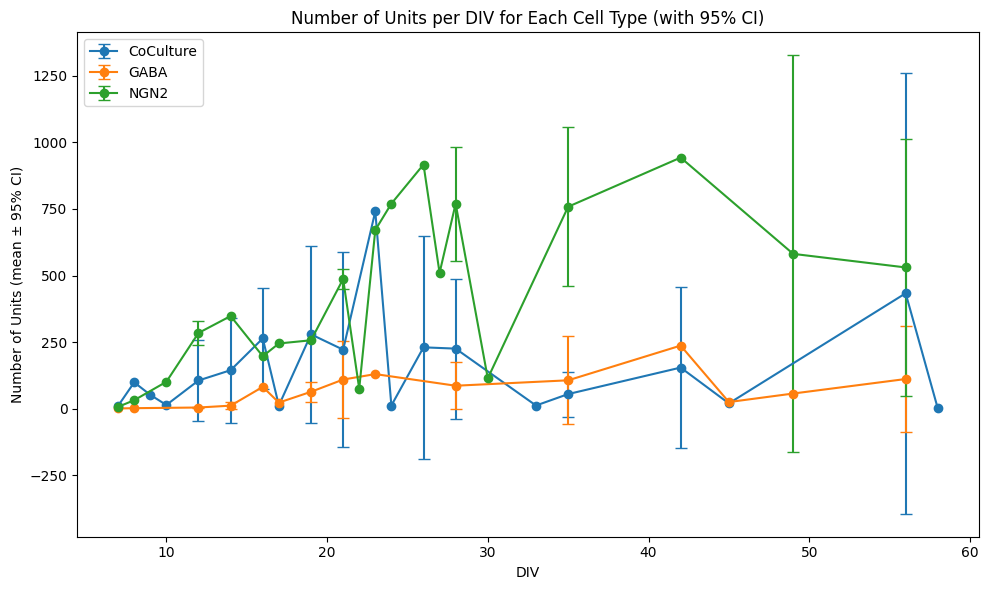

In [92]:
import seaborn as sns

import matplotlib.pyplot as plt

filtered_data = data.copy()
filtered_data = filtered_data[filtered_data['div'] < 60]
#replace the rows that have 'Co' in cell_type with 'CoCulture'
filtered_data['cell_type'] = filtered_data['cell_type'].replace({'Co': 'CoCulture'})
print(filtered_data['cell_type'].unique())

# Calculate number of units per area per chip for filtered data
units_per_area_chip = filtered_data.groupby(['chip_id', 'area', 'div', 'cell_type']).size().reset_index(name='num_units')

# Sum the number of units for each chip, div, and cell_type
units_per_chip_div = units_per_area_chip.groupby(['chip_id', 'div', 'cell_type'])['num_units'].sum().reset_index()

# Calculate mean and confidence interval for each div and cell_type
summary = units_per_chip_div.groupby(['div', 'cell_type'])['num_units'].agg(['mean', 'count', 'std']).reset_index()
summary['sem'] = summary['std'] / np.sqrt(summary['count'])
summary['ci'] = 1.96 * summary['sem']  # 95% confidence interval

plt.figure(figsize=(10, 6))
for cell_type, group in summary.groupby('cell_type'):
    plt.errorbar(
        group['div'],
        group['mean'],
        yerr=group['ci'],
        label=cell_type,
        marker='o',
        capsize=4
    )

plt.xlabel('DIV')
plt.ylabel('Number of Units (mean ± 95% CI)')
plt.title('Number of Units per DIV for Each Cell Type (with 95% CI)')
plt.legend()
plt.tight_layout()
plt.show()

['GABA' 'CoCulture' 'NGN2']


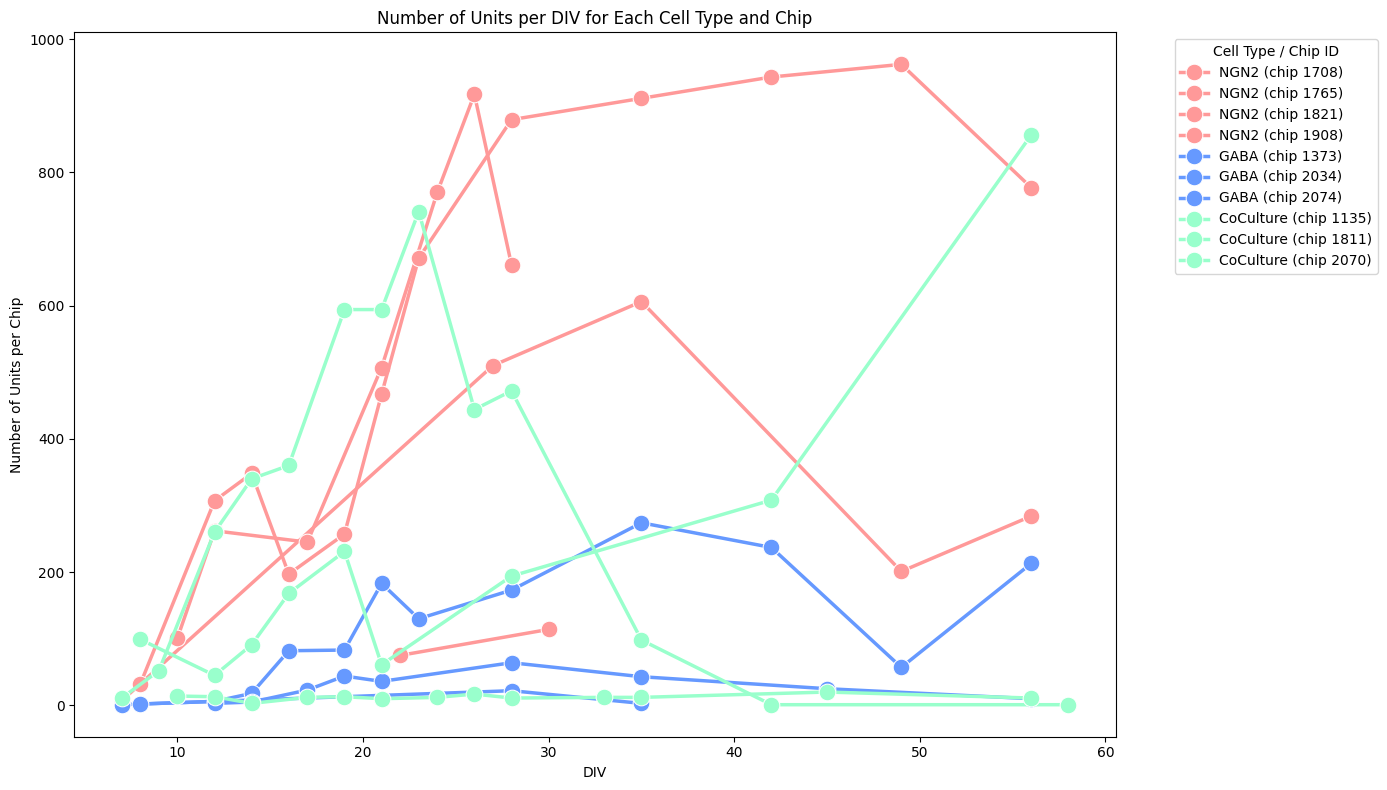

In [ ]:
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

with open(os.path.join(OUTPUT_PATH, 'extremum_results_final.pkl'), 'rb') as f:
    extremum_data  = pickle.load(f)

filtered_data = extremum_data.copy()
filtered_data['div'] = filtered_data['div'].astype(int)
filtered_data = filtered_data[filtered_data['div'] < 60]
print(filtered_data['cell_type'].unique())

# Set up base color palette for cell types
base_colors = {'NGN2': '#ff9999', 'GABA': '#6699ff', 'CoCulture': '#99ffcc'}
cell_types = ['NGN2', 'GABA', 'CoCulture']

# Calculate number of units per area per chip for filtered data
units_per_area_chip = filtered_data.groupby(['chip_id', 'area', 'div', 'cell_type']).size().reset_index(name='num_units')

# Sum the number of units for each chip, div, and cell_type
units_per_chip_div = units_per_area_chip.groupby(['chip_id', 'div', 'cell_type'])['num_units'].sum().reset_index()

plt.figure(figsize=(14, 8))

# For each cell type, generate a color palette for its chips
for cell_type in cell_types:
    subset = units_per_chip_div[units_per_chip_div['cell_type'] == cell_type]
    chips = subset['chip_id'].unique()
    # Generate a color palette for the chips of this cell type
    palette = sns.light_palette(base_colors[cell_type], n_colors=len(chips), input="hex")
    for i, chip in enumerate(chips):
        chip_data = subset[subset['chip_id'] == chip]
        sns.lineplot(
            x='div',
            y='num_units',
            data=chip_data,
            marker='o',
            markersize=12,
            linewidth=2.5,
            label=f"{cell_type} (chip {chip})",
            color=palette[i]
        )

plt.xlabel('DIV')
plt.ylabel('Number of Units per Chip')
plt.title('Number of Units per DIV for Each Cell Type and Chip')
plt.legend(title='Cell Type / Chip ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [34]:
with open(os.path.join(OUTPUT_PATH, 'Conduction_speeds/Conduction_speeds_all.pkl'), 'rb') as f:
    conduction_df = pickle.load(f)
conduction_df

[{'unit': 0,
  'direction': array([0.09006539, 0.02999236]),
  'chip_id': '1811',
  'div': 10,
  'cell_type': 'CoCulture',
  'area': '1',
  'filename': 'ID1811_N1_DIV10_DATE20241125_0938_spontaneous_CoCulture.raw.h5',
  'speed_ms-1': 1.559246197873763},
 {'unit': 1,
  'direction': array([ 0.01096483, -0.02567365]),
  'chip_id': '1811',
  'div': 10,
  'cell_type': 'CoCulture',
  'area': '1',
  'filename': 'ID1811_N1_DIV10_DATE20241125_0938_spontaneous_CoCulture.raw.h5',
  'speed_ms-1': 2.128966885604375},
 {'unit': 2,
  'direction': array([0.00850755, 0.00299471]),
  'chip_id': '1811',
  'div': 10,
  'cell_type': 'CoCulture',
  'area': '1',
  'filename': 'ID1811_N1_DIV10_DATE20241125_0938_spontaneous_CoCulture.raw.h5',
  'speed_ms-1': 2.1185844330590182},
 {'unit': 3,
  'direction': array([ 0.03214929, -0.31335574]),
  'chip_id': '1811',
  'div': 10,
  'cell_type': 'CoCulture',
  'area': '1',
  'filename': 'ID1811_N1_DIV10_DATE20241125_0938_spontaneous_CoCulture.raw.h5',
  'speed_ms-1':

In [ ]:
conduction_data

In [93]:
import pandas as pd
import pickle

# Load the three pickle files
print("Loading pickle files...")
with open(os.path.join(OUTPUT_PATH, 'extremum_results.pkl'), 'rb') as f:
    extremum_data  = pickle.load(f)

with open(os.path.join(OUTPUT_PATH, 'waveform_metrics_all_recordings.pkl'), 'rb') as f:
    waveform_data = pickle.load(f)

with open(os.path.join(OUTPUT_PATH, 'Conduction_speeds/Conduction_speeds_all.pkl'), 'rb') as f:
    conduction_data = pickle.load(f)


# Check data types and convert to DataFrames if needed
print("Checking data types...")
print(f"Extremum data type: {type(extremum_data)}")
print(f"Waveform data type: {type(waveform_data)}")
print(f"Conduction data type: {type(conduction_data)}")

# Convert to DataFrames if they're not already
if isinstance(extremum_data, pd.DataFrame):
    extremum_df = extremum_data
elif isinstance(extremum_data, list):
    extremum_df = pd.DataFrame(extremum_data)
    print("Converted extremum data from list to DataFrame")
else:
    print(f"Unexpected extremum data type: {type(extremum_data)}")

if isinstance(waveform_data, pd.DataFrame):
    waveform_df = waveform_data
elif isinstance(waveform_data, list):
    waveform_df = pd.DataFrame(waveform_data)
    print("Converted waveform data from list to DataFrame")
else:
    print(f"Unexpected waveform data type: {type(waveform_data)}")

if isinstance(conduction_data, pd.DataFrame):
    conduction_df = conduction_data
elif isinstance(conduction_data, list):
    conduction_df = pd.DataFrame(conduction_data)
    print("Converted conduction data from list to DataFrame")
else:
    print(f"Unexpected conduction data type: {type(conduction_data)}")

print(f"Extremum results shape: {extremum_df.shape}")
print(f"Waveform metrics shape: {waveform_df.shape}")
print(f"Conduction speeds shape: {conduction_df.shape}")

# Standardize column names for merging
print("\nStandardizing column names...")

# For waveform_df: rename 'network_id' to 'area'
if 'network_id' in waveform_df.columns:
    waveform_df = waveform_df.rename(columns={'network_id': 'area'})
    print("Renamed 'network_id' to 'area' in waveform_df")

# For conduction_df: rename 'unit' to 'unit_id'
if 'unit' in conduction_df.columns:
    conduction_df = conduction_df.rename(columns={'unit': 'unit_id'})
    print("Renamed 'unit' to 'unit_id' in conduction_df")

# Display column names to verify
print(f"\nExtremum columns: {list(extremum_df.columns)}")
print(f"Waveform columns: {list(waveform_df.columns)}")
print(f"Conduction columns: {list(conduction_df.columns)}")

# Check data types of merge columns
merge_cols = ['unit_id', 'chip_id', 'div', 'area']
print(f"\nData types before standardization:")
for col in merge_cols:
    if col in extremum_df.columns:
        print(f"Extremum {col}: {extremum_df[col].dtype}")
    if col in waveform_df.columns:
        print(f"Waveform {col}: {waveform_df[col].dtype}")
    if col in conduction_df.columns:
        print(f"Conduction {col}: {conduction_df[col].dtype}")

# Standardize data types for merge columns
print(f"\nStandardizing data types for merge columns...")

def standardize_merge_columns(df, df_name):
    """Convert merge columns to consistent types"""
    df_copy = df.copy()
    
    for col in merge_cols:
        if col in df_copy.columns:
            # Convert to string first to handle mixed types, then to appropriate type
            if col in ['unit_id', 'chip_id', 'div']:
                # These should be integers/strings - convert to string for consistency
                df_copy[col] = df_copy[col].astype(str)
                print(f"Converted {df_name} {col} to string")
            elif col == 'area':
                # Area might be string or numeric - keep as string for consistency
                df_copy[col] = df_copy[col].astype(str)
                print(f"Converted {df_name} {col} to string")
    
    return df_copy

extremum_df = standardize_merge_columns(extremum_df, 'extremum')
waveform_df = standardize_merge_columns(waveform_df, 'waveform')
conduction_df = standardize_merge_columns(conduction_df, 'conduction')

print(f"\nData types after standardization:")
for col in merge_cols:
    if col in extremum_df.columns:
        print(f"Extremum {col}: {extremum_df[col].dtype}")
    if col in waveform_df.columns:
        print(f"Waveform {col}: {waveform_df[col].dtype}")
    if col in conduction_df.columns:
        print(f"Conduction {col}: {conduction_df[col].dtype}")

# Define the columns to merge from each dataset
waveform_cols_to_merge = [
    'peak_to_trough_duration', 'peak_trough_ratio', 'repolarization_slope', 
    'recovery_slope', 'half_width', 'peak_idx', 'trough_idx', 
    'amplitude uV', 'template'
]

conduction_cols_to_merge = ['speed_ms-1']

# Common columns for merging
merge_cols = ['unit_id', 'chip_id', 'div', 'area']

print(f"\nMerging on columns: {merge_cols}")

# Check if all merge columns exist in each dataframe
for df_name, df in [('extremum', extremum_df), ('waveform', waveform_df), ('conduction', conduction_df)]:
    missing_cols = [col for col in merge_cols if col not in df.columns]
    if missing_cols:
        print(f"WARNING: {df_name} is missing columns: {missing_cols}")
    else:
        print(f"{df_name} has all merge columns")

# Check for duplicate combinations in merge columns
print(f"\nChecking for duplicates in merge columns:")
for df_name, df in [('extremum', extremum_df), ('waveform', waveform_df), ('conduction', conduction_df)]:
    available_merge_cols = [col for col in merge_cols if col in df.columns]
    if len(available_merge_cols) > 0:
        total_rows = len(df)
        unique_combinations = df[available_merge_cols].drop_duplicates().shape[0]
        print(f"{df_name}: {total_rows} rows, {unique_combinations} unique combinations")
        if total_rows != unique_combinations:
            print(f"  WARNING: {df_name} has duplicate combinations in merge columns!")

# Check if desired columns exist in source dataframes
missing_waveform_cols = [col for col in waveform_cols_to_merge if col not in waveform_df.columns]
if missing_waveform_cols:
    print(f"WARNING: Missing waveform columns: {missing_waveform_cols}")
    waveform_cols_to_merge = [col for col in waveform_cols_to_merge if col in waveform_df.columns]
    print(f"Will merge available waveform columns: {waveform_cols_to_merge}")

missing_conduction_cols = [col for col in conduction_cols_to_merge if col not in conduction_df.columns]
if missing_conduction_cols:
    print(f"WARNING: Missing conduction columns: {missing_conduction_cols}")
    conduction_cols_to_merge = [col for col in conduction_cols_to_merge if col in conduction_df.columns]
    print(f"Will merge available conduction columns: {conduction_cols_to_merge}")

# Prepare dataframes for merging (select only needed columns)
waveform_merge_df = waveform_df[merge_cols + waveform_cols_to_merge].copy()
conduction_merge_df = conduction_df[merge_cols + conduction_cols_to_merge].copy()

print(f"\nBefore merging:")
print(f"Extremum unique combinations: {extremum_df[merge_cols].drop_duplicates().shape[0]}")
print(f"Waveform unique combinations: {waveform_merge_df[merge_cols].drop_duplicates().shape[0]}")
print(f"Conduction unique combinations: {conduction_merge_df[merge_cols].drop_duplicates().shape[0]}")

# Merge waveform data
print("\nMerging waveform data...")
merged_df = extremum_df.merge(
    waveform_merge_df, 
    on=merge_cols, 
    how='left', 
    suffixes=('', '_waveform')
)

print(f"After waveform merge: {merged_df.shape}")

# Merge conduction data
print("Merging conduction data...")
final_df = merged_df.merge(
    conduction_merge_df, 
    on=merge_cols, 
    how='left', 
    suffixes=('', '_conduction')
)

print(f"After conduction merge: {final_df.shape}")

# Check for successful merges
waveform_merged_count = final_df[waveform_cols_to_merge[0]].notna().sum() if waveform_cols_to_merge else 0
conduction_merged_count = final_df[conduction_cols_to_merge[0]].notna().sum() if conduction_cols_to_merge else 0

print(f"\nMerge results:")
print(f"Rows with waveform data: {waveform_merged_count}/{len(final_df)}")
print(f"Rows with conduction data: {conduction_merged_count}/{len(final_df)}")

# Display sample of merged data
print(f"\nFinal dataframe shape: {final_df.shape}")
print(f"Final columns: {list(final_df.columns)}")

# Save the updated extremum_results.pkl
print("\nSaving updated extremum_results.pkl...")
with open(os.path.join(OUTPUT_PATH,'extremum_results.pkl'), 'wb') as f:
    pickle.dump(final_df, f)

print("✓ Successfully updated extremum_results.pkl with merged data!")

# Display a sample of the merged data
print(f"\nSample of merged data:")
display_cols = ['unit_id', 'chip_id', 'div', 'area'] + waveform_cols_to_merge[:3] + conduction_cols_to_merge
available_display_cols = [col for col in display_cols if col in final_df.columns]
print(final_df[available_display_cols].head())

Loading pickle files...
Checking data types...
Extremum data type: <class 'pandas.core.frame.DataFrame'>
Waveform data type: <class 'pandas.core.frame.DataFrame'>
Conduction data type: <class 'list'>
Converted conduction data from list to DataFrame
Extremum results shape: (21757, 16)
Waveform metrics shape: (21757, 15)
Conduction speeds shape: (15930, 8)

Standardizing column names...
Renamed 'network_id' to 'area' in waveform_df
Renamed 'unit' to 'unit_id' in conduction_df

Extremum columns: ['filename', 'chip_id', 'area', 'div', 'electrode', 'unit_idx', 'unit_id', 'data_type', 'firing_rate', 'isi_mean', 'isi_median', 'isi_std', 'isi_cv', 'burst_index', 'spike_count', 'cell_type']
Waveform columns: ['unit_id', 'chip_id', 'div', 'cell_type', 'area', 'peak_to_trough_duration', 'peak_trough_ratio', 'repolarization_slope', 'recovery_slope', 'half_width', 'peak_idx', 'trough_idx', 'amplitude uV', 'template', 'unit_index']
Conduction columns: ['unit_id', 'direction', 'chip_id', 'div', 'cell

In [94]:
final_df

,filename,chip_id,area,div,electrode,unit_idx,unit_id,data_type,firing_rate,isi_mean,...,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,half_width,peak_idx,trough_idx,amplitude uV,template,speed_ms-1
0,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,19947,13,14,SPIKEMAT_EXTREMUM,12.709669,78.738707,...,0.65,0.154787,-1.793017e+06,-120049.949646,0.25,53,40,1212.455200,"[-2.772856, -2.7412357, -3.0772898, -3.0556083...",NaN
1,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,21024,20,24,SPIKEMAT_EXTREMUM,7.048586,142.062601,...,1.00,0.167886,-1.456302e+06,-89764.335632,0.25,61,41,886.629028,"[-10.695522, -10.419479, -10.015421, -9.742775...",NaN
2,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,22124,11,12,SPIKEMAT_EXTREMUM,2.352022,426.880444,...,0.30,0.285031,-5.419659e+05,-113681.030273,0.20,46,40,400.267365,"[-2.7542396, -3.1696162, -3.480334, -3.6394703...",NaN
3,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,19518,3,3,SPIKEMAT_EXTREMUM,1.631672,616.494675,...,0.60,0.442921,-8.626428e+05,-458804.046631,0.15,52,40,624.009033,"[2.4428904, 2.9308987, 3.299109, 3.8961368, 5....",NaN
4,ID1765_N8_DIV140_DATE20250207_1023_spontaneous...,1765,8,140,21024,19,23,SPIKEMAT_EXTREMUM,3.079356,325.742462,...,0.60,0.220502,-2.815087e+05,-30752.592087,0.30,52,40,157.077209,"[-0.27469844, 0.012822852, 0.6820404, 1.273498...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21752,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,15437,3,11,SPIKEMAT_EXTREMUM,0.781105,1304.392453,...,0.45,0.379122,-5.742650e+05,-170629.669189,0.25,49,40,300.761230,"[-0.022627389, 0.5893635, 1.3431509, 1.5283918...",0.413231
21753,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,8610,2,9,SPIKEMAT_EXTREMUM,3.805586,263.763208,...,1.25,0.127528,-4.270967e+05,-10715.694427,0.35,65,40,215.998138,"[-6.268952, -6.728142, -6.5936084, -6.0189147,...",0.350348
21754,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14993,6,16,SPIKEMAT_EXTREMUM,1.376135,734.322105,...,0.85,0.228397,-1.347990e+05,-7238.524437,0.35,57,40,67.399475,"[-1.4445795, -0.31602663, 1.3166906, 1.586288,...",0.267157
21755,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14553,5,15,SPIKEMAT_EXTREMUM,0.984322,1031.090299,...,1.20,0.047772,-4.714147e+05,-9284.446716,0.15,64,40,282.733643,"[0.93760747, 1.8134977, 2.2106574, 2.2346528, ...",0.444945


In [ ]:

#create a copy of the final_df and remove 'chip_id' 1135 and 1373
filtered_final_df = final_df.copy()
filtered_final_df = filtered_final_df[~filtered_final_df['chip_id'].isin(['1135', '1373'])]
#keep only until div 60
filtered_final_df = filtered_final_df[filtered_final_df['div'].astype(int) < 60]
filtered_final_df.reset_index(drop=True, inplace=True)


filtered_final_df

,filename,chip_id,area,div,electrode,unit_idx,unit_id,data_type,firing_rate,isi_mean,...,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,half_width,peak_idx,trough_idx,amplitude uV,template,speed_ms-1
0,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,7074,27,29,SPIKEMAT_EXTREMUM,3.528320,284.459158,...,1.50,0.086088,-272887.939453,0.000000,0.40,79,49,143.816742,"[-6.314716, -6.63426, -7.2937217, -8.56234, -1...",1.419311
1,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,9256,18,19,SPIKEMAT_EXTREMUM,2.033483,494.899363,...,0.70,0.284248,-268083.740234,-42660.037994,0.30,54,40,148.376755,"[6.687971, 6.791456, 6.7550836, 6.835834, 6.95...",0.528231
2,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,6420,30,32,SPIKEMAT_EXTREMUM,1.507604,669.022414,...,1.15,0.134037,-185450.546265,-13119.379997,0.15,63,40,99.213623,"[-0.026687747, -0.15761572, -0.006503847, 1.00...",0.942404
3,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,13216,23,24,SPIKEMAT_EXTREMUM,4.588149,218.568503,...,1.10,0.261754,-426294.647217,-36261.528015,0.30,62,40,237.855667,"[5.728044, 6.5891643, 7.773545, 9.744434, 11.7...",1.406983
4,ID2034_N3_DIV35_DATE20241127_1544_spontaneous_...,2034,3,35,9026,9,9,SPIKEMAT_EXTREMUM,1.656200,608.546063,...,1.35,0.157318,-200083.587646,-26335.556030,0.35,67,40,102.549576,"[-1.3907224, -1.3382281, -1.6187385, -2.394037...",0.351213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15930,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,15437,3,11,SPIKEMAT_EXTREMUM,0.781105,1304.392453,...,0.45,0.379122,-574265.014648,-170629.669189,0.25,49,40,300.761230,"[-0.022627389, 0.5893635, 1.3431509, 1.5283918...",0.413231
15931,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,8610,2,9,SPIKEMAT_EXTREMUM,3.805586,263.763208,...,1.25,0.127528,-427096.679688,-10715.694427,0.35,65,40,215.998138,"[-6.268952, -6.728142, -6.5936084, -6.0189147,...",0.350348
15932,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14993,6,16,SPIKEMAT_EXTREMUM,1.376135,734.322105,...,0.85,0.228397,-134798.950195,-7238.524437,0.35,57,40,67.399475,"[-1.4445795, -0.31602663, 1.3166906, 1.586288,...",0.267157
15933,ID1765_N0_DIV49_DATE20241108_1016_spontaneous_...,1765,0,49,14553,5,15,SPIKEMAT_EXTREMUM,0.984322,1031.090299,...,1.20,0.047772,-471414.733887,-9284.446716,0.15,64,40,282.733643,"[0.93760747, 1.8134977, 2.2106574, 2.2346528, ...",0.444945


In [ ]:
with open(os.path.join(OUTPUT_PATH,'extremum_results.pkl'), 'wb') as f:
    pickle.dump(final_df, f)

In [95]:
final_df.to_pickle(os.path.join(OUTPUT_PATH, 'extremum_results_final.pkl'))